In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
import numpy as np
from keras.models import load_model
%matplotlib inline

In [8]:
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
])

model = load_model('data/models/PooledGRU-GloVe.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [9]:
df = pd.read_csv('data/train.csv')

In [10]:
X = df['comment_text']
y = df['toxic']

In [12]:
text_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [13]:
text_clf.predict(['you suck and I fucking hate you'])

array([1])

In [14]:
text_clf.predict_proba(['you suck and I fucking hate you'])

array([[0.03838288, 0.96161712]])

In [15]:
text_clf.predict_proba(['that was great, thank you!'])

array([[0.99748885, 0.00251115]])

In [21]:
text_clf.predict(['that was great, thank you!'])

array([0])

Test on sample twitter dataset

In [56]:
from keras.preprocessing import text, sequence
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

X_train = train["comment_text"].fillna("fillna").values
X_test = test["comment_text"].fillna("fillna").values
tokenizer.fit_on_texts(list(X_train) + list(X_test))

# Takes about 40 sec
max_features = 30000
maxlen = 100
embed_size = 300
tokenizer = text.Tokenizer(num_words=max_features)

In [32]:
twitter_df = pd.read_csv('data/sample_with_label.csv')
twitter_text = twitter_df["TweetText"].fillna("fillna").values
twitter_tokenized = tokenizer.texts_to_sequences(twitter_text)
twitter_tokenized = sequence.pad_sequences(twitter_tokenized, maxlen=maxlen)

In [33]:
twitter_df = pd.read_csv('data/sample_with_label.csv')
twitter_df.columns = ['Index','TweetID','ScreenName','TweetText','TweetDateTime','Followers','UserID','WasDeleted']
twitter_df.head()


,Index,TweetID,ScreenName,TweetText,TweetDateTime,Followers,UserID,WasDeleted
0,0,1244721273793646594,ShannePanne,b'Rhoa',2020-03-30 20:20:52,287,990004076829200385,0
1,1,1244721275232301058,25_ShadesOfK,b'@HisTemp_TAYtion Lol I learned from that shi...,2020-03-30 20:20:52,1189,624244930,0
2,2,1244721275936878593,PlagueJesterSky,b'Trying to set up the stream and I keep getti...,2020-03-30 20:20:52,415,755613447702847488,0
3,3,1244721278650650624,spitbull1963,b'@EricksonReal @Ilhan And you can test as muc...,2020-03-30 20:20:53,16,47425986,0
4,4,1244721278931664896,kamanfrancis,b'Me taking notes for the future when I\xe2\x8...,2020-03-30 20:20:53,1928,269295980,0


In [35]:
twitter_df['ToxicityProba'] = text_clf.predict_proba(twitter_df['TweetText'])[:,1]
twitter_df['ToxicityProba2'] = model.predict(twitter_tokenized, verbose=1)[:,1]

29449/29449 [==============================] - 16s 535us/step


In [36]:
twitter_df

,Index,TweetID,ScreenName,TweetText,TweetDateTime,Followers,UserID,WasDeleted,ToxicityProba,ToxicityProba2
0,0,1244721273793646594,ShannePanne,b'Rhoa',2020-03-30 20:20:52,287,990004076829200385,0,0.095844,0.000467
1,1,1244721275232301058,25_ShadesOfK,b'@HisTemp_TAYtion Lol I learned from that shi...,2020-03-30 20:20:52,1189,624244930,0,0.175892,0.129259
2,2,1244721275936878593,PlagueJesterSky,b'Trying to set up the stream and I keep getti...,2020-03-30 20:20:52,415,755613447702847488,0,0.001030,0.006538
3,3,1244721278650650624,spitbull1963,b'@EricksonReal @Ilhan And you can test as muc...,2020-03-30 20:20:53,16,47425986,0,0.003514,0.030122
4,4,1244721278931664896,kamanfrancis,b'Me taking notes for the future when I\xe2\x8...,2020-03-30 20:20:53,1928,269295980,0,0.004717,0.000100
...,...,...,...,...,...,...,...,...,...,...
29444,29444,1244740153874223109,rSakirs,b'@Mertipekcix Ve bu ki\xc5\x9filerin \xc3\xa7...,2020-03-30 21:35:53,690,1238135533202702336,1,0.344168,0.221701
29445,29445,1244740154981580800,lostboyale,b'Only the girls with onlyfans making bread rn...,2020-03-30 21:35:53,209,713132404454633472,0,0.017807,0.000515
29446,29446,1244740160522076160,queensierra_rox,b'@ForlornJunkHeap @brujahistorica Serena shov...,2020-03-30 21:35:55,130,2828784699,0,0.036084,0.000795
29447,29447,1244740161197543430,vrepitsash,b'@5SOS #ASK5SOS #5SOSCALM whos your favorite ...,2020-03-30 21:35:55,1794,2806244672,0,0.029545,0.000558


In [37]:
twitter_df = twitter_df.sort_values(by=['ToxicityProba2'],ascending=False)
twitter_df.head(10)


,Index,TweetID,ScreenName,TweetText,TweetDateTime,Followers,UserID,WasDeleted,ToxicityProba,ToxicityProba2
17205,17205,1244732947699294208,fanaticalgreed,b'\xe3\x85\xa4\xe2\xa0\x80\xe2\x9d\x9b Fuck Fu...,2020-03-30 21:07:15,66,3084573958,0,0.995611,0.731721
27398,27398,1244738889706876933,bgfhcsehu,b'ion give a fuck who u got to back u up none ...,2020-03-30 21:30:52,83,1232048803550826505,0,0.943685,0.731442
24717,24717,1244737257942237190,MKRIZSA50,b'@POTUS \nFUCK YOU FUCK YOUR LEADERSHIP FUCK ...,2020-03-30 21:24:23,5735,235395935,0,0.804390,0.723313
24244,24244,1244736966538772480,LeeUnused,b'@POTUS \nFUCK YOU FUCK YOUR LEADERSHIP FUCK ...,2020-03-30 21:23:13,89,1178108263751192576,0,0.804390,0.723313
4479,4479,1244724707997319169,nayvsthewrld,b'@PDChina fuck you bitch ass slanted eyed ugl...,2020-03-30 20:34:30,4,1238617987457773568,0,0.882509,0.722949
17601,17601,1244733161248116736,ZyFi_,b'fuck you Kefla. Fuck you bitch #PS4share\n\n...,2020-03-30 21:08:06,97,1148424969623392256,0,0.587744,0.693825
21526,21526,1244735395432103936,annonfive,"b'@h3h3productions @Idubbbz LOOOOOOL FUCK YOU,...",2020-03-30 21:16:58,16,1216197434273140737,0,0.943455,0.689548
22043,22043,1244735701264064514,_bitchbot,"b""fuck wood. wtf is teak? bitch I'll kill u""",2020-03-30 21:18:11,37,745734920262328325,0,0.858434,0.686855
5680,5680,1244725529103740928,kiajewelz,b'If you\xe2\x80\x99ll fuck one of yo nigga op...,2020-03-30 20:37:46,1572,727182571,0,0.637187,0.680801
11115,11115,1244729143297744898,mousetrap6731,b'@realDonaldTrump Go fuck yourself you orange...,2020-03-30 20:52:08,258,964929862535450624,0,0.752252,0.672395


In [68]:
def is_response_tweet(tweet):
    return '@' in tweet

In [39]:
twitter_df['IsResponseTweet'] = twitter_df['TweetText'].apply(is_response_tweet)

In [40]:
response_tweets_df = twitter_df[twitter_df['IsResponseTweet']]

In the top 50 predicted toxic response tweets, 10% of them were deleted.

In [65]:
response_tweets_df['WasDeleted'].values.sum()

884

By contrast, in the bottom 50 predicted toxic response tweets, 2% of them were deleted.

In [59]:
response_tweets_df.tail(200)['WasDeleted'].values.sum()/200

0.035

There are a lot of tweets with pornographic content that are getting deleted...

In [43]:
twitter_df[twitter_df['WasDeleted']==1].head(5)

,Index,TweetID,ScreenName,TweetText,TweetDateTime,Followers,UserID,WasDeleted,ToxicityProba,ToxicityProba2,IsResponseTweet
115,115,1244721424310337548,daishajohnson__,"b'@orixh74 Bitch fuck you , you dirty bitch ..'",2020-03-30 20:21:28,389,2761430503,1,0.979456,0.657970,True
18614,18614,1244733710878023681,JDonyelll,b'Ahhhhhh fuck u &amp; ya family bitch \xf0\x9...,2020-03-30 21:10:17,2132,988945851123949568,1,0.803055,0.655179,False
14329,14329,1244731262394339329,MaurizioJackson,"b'""Bitch stolen my ideas""\n\n""Bitch stolen my ...",2020-03-30 21:00:33,6,1225818290888593409,1,0.415868,0.626700,False
2538,2538,1244723475618521088,BuuToxic,b'Real ass bitch give a fuck bout a nigga righ...,2020-03-30 20:29:37,9,1242721831729029126,1,0.835329,0.599323,False
20967,20967,1244735061972463617,yoongartt,b'@sarazorzii fuck you bitch??',2020-03-30 21:15:39,2812,1212415457535201280,1,0.987526,0.596533,True


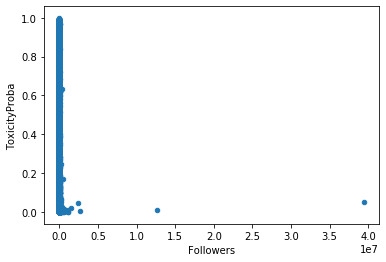

In [20]:
twitter_df.plot.scatter(x='Followers',y='ToxicityProba')